# Домашнее задание 2 (5 баллов).

*Все задания ниже имеют равный вес (5/10)*

Код для импорта мы написали за вас (не благодарите, нам не трудно). Дальше код будете писать вы.

[Тут](https://habr.com/ru/companies/ruvds/articles/494720/) шпора по pandas. За основу домашнего задания взят ноутбук [отсюда](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/) (не подглядывайте!).

In [11]:
import pandas as pd
import numpy as np

#### Описание данных

Автор д/з - плохой человек, который не стал переводить описание с мотивировкой, что весь DS на английском. Так что описание полей будет на английском:

1. Account ID
- Description: A unique identifier for each social media account in the dataset.
- Type: Integer
- Example: 1, 2, 3, …
2. Username
- Description: The username or handle of the social media account.
- Type: String
- Example: john_doe, tech_guru_22, fitness_freak
3. Platform
- Description: The social media platform the account is using (Instagram, Twitter, Facebook, TikTok, LinkedIn).
- Type: Categorical (String)
- Example: Instagram, Twitter, Facebook, TikTok, LinkedIn
4. Follower Count
- Description: The total number of followers the account has.
- Type: Integer
- Example: 1500, 245000, 78000
5. Posts Per Week
- Description: The average number of posts the account creates per week.
- Type: Integer
- Example: 3, 5, 7
6. Engagement Rate
- Description: The percentage of interactions (likes, comments, shares) relative to the follower count. This is a measure of how engaging the content is.
- Type: Float
- Range: 0.01 to 0.15
- Example: 0.045 (4.5% engagement rate)
7. Ad Spend (USD)
- Description: The monthly amount spent on advertising or promoting posts.
- Type: Float
- Example: 150.75, 850.00, 300.50
8. Conversion Rate
- Description: The percentage of users who take a desired action (e.g., clicking a link, signing up, etc.) after interacting with an ad.
- Type: Float
- Range: 0.01 to 0.05 (1% to 5% conversion rate)
- Example: 0.025 (2.5% conversion rate)
9. Campaign Reach
- Description: The total number of unique users reached by the user’s campaigns in a given month.
- Type: Integer
- Example: 5000, 20000, 15000

#### Задание 0

Подгрузите данные. Да-да, за чтение таблицы баллов не будет))

**Hint**: [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [12]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df.dtypes


,0
Account ID,int64
Username,object
Platform,object
Follower Count,int64
Posts Per Week,int64
Engagement Rate,float64
Ad Spend (USD),float64
Conversion Rate,float64
Campaign Reach,int64


#### Задание 1

Колонка `Platform` содержит название различных платформ. Давайте представим, что в них есть некоторое отношение порядка. Закодируйте каждую платформу целым числом (от 0 до N) и положите этот "код" в новую колонку `Platform_Code`. Теперь вычислите корреляцию Спирмена между всеми парами колонок в датасете (результатом будет таблица корреляций). В качестве ответа выведите значение корреляции `Platform_Code` с `Engagement Rate`. Можете после вывода числа еще коротко написать, что оно означает (нет, это не оценивается).

**Hint**: [pd.factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html), [pd.DataFrame.select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html), [pd.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [15]:
df

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
0,1,harrislisa,TikTok,54217,3,0.0986,538.10,0.0490,1308
1,2,rhicks,LinkedIn,987518,5,0.0834,479.24,0.0174,13302
2,3,qthomas,Facebook,218870,3,0.1020,150.36,0.0318,11043
3,4,carlosholt,Instagram,207432,6,0.0834,932.62,0.0400,12074
4,5,parsonsashley,Facebook,350204,2,0.0642,504.44,0.0463,14083
...,...,...,...,...,...,...,...,...,...
9995,9996,sbyrd,TikTok,388169,6,0.0642,362.91,0.0108,45091
9996,9997,jacksongerald,TikTok,150775,1,0.0642,177.92,0.0262,33084
9997,9998,eryan,Twitter,427451,5,0.0834,432.65,0.0402,12484
9998,9999,barbara57,LinkedIn,132884,4,0.0986,892.99,0.0329,35766


In [16]:
df['Platform_Code'] = df['Platform'].factorize()[0]

In [17]:
df.select_dtypes(exclude=['object']).corr('spearman')['Platform_Code']['Engagement Rate']

0.03138169529349812

Кореляция крайне низкая между выбором платформы и уровнем вовлеченности




#### Задание 2

Теперь посмотрите на столбец `Follower Count`. В нем какие-то числа. Иногда бывает полезно провести дискретизацию такого признака. Разбейте все значения в столбце на 4 группы: "Low", "Medium", "High", "Very High". Каждая группа включает в себя новые 25% данных. То есть, Low включает в себя 25% самых маленьких значений признака и так далее. Положите значения "Low", "Medium", "High" или "Very High" для каждого сэмпла датасета в новую колонку `Follower_Bin`. Теперь посчитайте среднее значение `Engagement Rate` для каждой категории из `Follower_Bin`. В качестве ответа выведите значение для категории "High".

**Hint**: [pd.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html), [pd.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [pd.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [18]:
df['Follower_Bin'] = pd.qcut(df['Follower Count'], 4, labels=["Low", "Medium", "High", "Very High"])

In [19]:
# df

In [20]:
df.groupby(df['Follower_Bin'], observed=False)["Engagement Rate"].get_group('High').mean()

0.08655032000000001

#### Задание 3

Иногда бывает полезно превратить широкую таблицу в длинную (например, для визуализаций сразу нескольких признаков на одной картинке). Да, звучит странно, но именно этим вы сейчас и займетесь. Сделайте новый датафрейм `melted_df`, в который вы поместите каждый сэмпл датасета 6 раз: по одному разу на значение из 'Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate' и 'Campaign Reach'. То есть, вы берете сэмпл из датасета (строку) и превращаете ее в 6 отдельных строк. Каждая отдельная строка в столбце `Metric` имеет имя из предложенного списка 5 признаков, а в столбце `Value` - значение данного сэмпла по этому признаку. Значение `Platform` повторяется в этих 6 строках.

Иначе говоря,

```json
{
    "Account ID": 1,
    "Username": "harrislisa",
    "Platform": "TikTok",
    "Follower Count": 54217,
    "Posts Per Week": 3,
    "Engagement Rate": 0.0986,
    "Ad Spend (USD)": 538.1,
    "Conversion Rate": 0.049,
    "Campaign Reach": 1308,
    "Platform_Code": 0,
    "Follower_Bin": "Low"
}
```

превращается в

```json
{
    "Platform": "TikTok",
    "Metric": "Follower Count",
    "Value": 54217,
},
{
    "Platform": "TikTok",
    "Metric": "Posts Per Week",
    "Value": 3,
}, ...
```

Для каждого уникальной пары значений (`Platform`, `Metric`) посчитайте моду среди всех значений `Value` для этой пары, результат сделайте списком и оставьте только наибольшее. В качестве ответа выведите сумму полученных мод (сумму всех значений в столбце `Value` уже после вычисления мод). Иначе говоря, выведите сумму всех мод значений для всех уникальных пар (`Platform`, `Metric`).

**Hint**: [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html), [pd.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html), [pd.DataFrameGroupBy.agg](https://pandas.pydata.org/docs/dev/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [21]:
# df.columns

In [22]:
melted_df = pd.melt(df,
                    id_vars = ['Platform'],
                    value_vars = ['Follower Count', 'Posts Per Week',
                                  'Ad Spend (USD)', 'Conversion Rate',
                                  'Engagement Rate', 'Campaign Reach'],
                    var_name = 'Metric',
                    value_name = "Value")

In [23]:
moda = melted_df.groupby(['Platform', 'Metric'])['Value']
moda = moda.apply(pd.Series.mode).reset_index()
moda = moda.groupby(['Platform', 'Metric'])['Value'].max().reset_index()

In [24]:
moda['Value'].sum()

3100285.4716

#### Задание 4

А теперь хочется посмотреть на самые популярные аккаунты на разных платформах. Для каждой платформы отсортируйте датафрейм по убыванию количества подписчиков (`Follower Count`) - да, без циклов, сразу для всех платформ сделать сортировку, а затем оставьте только первые три записи для каждой платформы - это и будут три самых популярных аккаунта для каждой платформы. В качестве ответа выведите саму таблицу и минимальное значение `Follower Count` в ней.

**Hint**: к *groupby* можно применять функции - это эквивалентно применению функции к каждой "группе" внутри groupby-объекта. Читайте [про применение apply к датафрейму после groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#flexible-apply).

In [25]:
melted_df[melted_df['Metric'] == 'Follower Count']

,Platform,Metric,Value
0,TikTok,Follower Count,54217.0
1,LinkedIn,Follower Count,987518.0
2,Facebook,Follower Count,218870.0
3,Instagram,Follower Count,207432.0
4,Facebook,Follower Count,350204.0
...,...,...,...
9995,TikTok,Follower Count,388169.0
9996,TikTok,Follower Count,150775.0
9997,Twitter,Follower Count,427451.0
9998,LinkedIn,Follower Count,132884.0


In [26]:
sort_reverse = melted_df[melted_df['Metric'] == 'Follower Count'].groupby(['Platform'])['Value'].apply(pd.Series.sort_values, ascending = False)

In [27]:
three_pop = sort_reverse.groupby(['Platform']).head(3)

In [28]:
three_pop.min()

997512.0

#### Задание 5

Хочется посчитать какую-то метрику. Мы хотим посмотреть, на отношение разности суммы подписчиков аккаунтов с высокой и низкой конверсией к суммарному охвату рекламы на каждой платформе. То есть, мы делим аккаунты на две группы: высокая и низкаЯ конверсия. Затем мы смотрим на то, на сколько сильно влияние аккаунтов с высокой конверсией по сравнению с аккаунтами с низкой конверсией.

Давайте определим *Conversion Influence* следущим образом:

$$Conversion Influence = \frac{Total Follower\ Count (High) - Total Follower\ Count (Low)}{Total Campaign Reach (High)+Total Campaign Reach (Low)}$$

Считать эту метрику мы будет для каждой `Platform`. В этой формуле High - это значения всех сэмплов датасета, в которых `Conversion Rate` больше медианы, а `Low` - не более медианы. `Total Feature` - это суммарное количество значений `Feature` либо по `High` сэмплам, либо по `Low`.

Чтобы постоянно не пересчитывать, где High. где Low, сделайте новую колонку в датасете `Conversion_Category`. Положите в нее для каждой строки либо High, либо Low.

Выведите платформу с самым большим `Conversion Influence`.

**Hint**: данное задание не про *groupby*, а скорее про [pd.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html). Сделайте сводную таблицу, по которой уже можно посчитать суммы, а затем подставить их в формулы.

In [29]:
median = melted_df[melted_df['Metric'] == "Conversion Rate"]['Value'].median()
df['Conversion_Category'] = df['Conversion Rate'].apply(lambda x: 'High' if x > median else 'Low')
df

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach,Platform_Code,Follower_Bin,Conversion_Category
0,1,harrislisa,TikTok,54217,3,0.0986,538.10,0.0490,1308,0,Low,High
1,2,rhicks,LinkedIn,987518,5,0.0834,479.24,0.0174,13302,1,Very High,Low
2,3,qthomas,Facebook,218870,3,0.1020,150.36,0.0318,11043,2,Low,High
3,4,carlosholt,Instagram,207432,6,0.0834,932.62,0.0400,12074,3,Low,High
4,5,parsonsashley,Facebook,350204,2,0.0642,504.44,0.0463,14083,2,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,sbyrd,TikTok,388169,6,0.0642,362.91,0.0108,45091,0,Medium,Low
9996,9997,jacksongerald,TikTok,150775,1,0.0642,177.92,0.0262,33084,0,Low,Low
9997,9998,eryan,Twitter,427451,5,0.0834,432.65,0.0402,12484,4,Medium,High
9998,9999,barbara57,LinkedIn,132884,4,0.0986,892.99,0.0329,35766,1,Low,High


In [30]:
df_high_low = df.pivot_table(index = 'Platform', values = ['Follower Count', 'Campaign Reach'], columns = 'Conversion_Category', aggfunc = 'sum')
df_high_low['Conversion Influence'] = (df_high_low['Follower Count', 'High'] - df_high_low['Follower Count', 'Low']) / (df_high_low['Campaign Reach', 'High'] + df_high_low['Campaign Reach', 'Low'])

In [31]:
df_high_low['Conversion Influence'].max()

1.0908724546727178

In [32]:
df_high_low['Conversion Influence'].idxmax()

'Twitter'

#### Задание 6

Мы знаем, что вам понравилось считать метрики по формуле. Давайте закрепим этот успех. Теперь для каждой платформы посчитаем, на сколько эффективна реклама в разрезе трех последовательных записей в датасете.

Для каждой платформы отсортируйте записи в порядке убывания `Posts Per Week`. Будто бы аккаунты, которые постят чаще, используют более "активные" стратегии по рекламе. Теперь посчитайте *скользущие суммы с окном 3* по `Campaign Reach` и `Ad Spend (USD)`. Скользящая сумма с окном N - это вы идете по массиву, берете все последовательные тройки записей и суммируете их. Для первых двух записей троек не найдется. Для них скользящее среднее - NaN, что нам не помешает.

Теперь для каждого окна посчитайте

$$Rolling Efficiency Ratio = \frac{Rolling Sum of Campaign Reach}{Rolling Sum of Ad Spend}$$

По сути, для каждого окна вы посчитаете сколько пользователе привлеклось за один доллар, потреченный на рекламу, в данном окне. Понятно, что значений будет столько, сколько окон. Нам интересно максимально значение такой эффективности для каждой платформы.

В качестве ответа выведите название платформы с наибольшей максимальной эффективность и наименьшей (два названия, не одно, не три, ровно два).

**Hint**: окна можно делать через [pd.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).

In [104]:
dfPPW = df.sort_values(['Platform', 'Posts Per Week'], ascending = False)
dfPPW

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach,Platform_Code,Follower_Bin,Conversion_Category
6,7,tammy32,Twitter,267622,7,0.0856,884.06,0.0196,1461,4,Medium,Low
62,63,oprice,Twitter,417945,7,0.0986,383.32,0.0358,26750,4,Medium,High
84,85,jonathanjones,Twitter,122372,7,0.0642,894.32,0.0201,25945,4,Low,Low
96,97,john57,Twitter,400038,7,0.0834,973.44,0.0318,7021,4,Medium,High
155,156,krystal64,Twitter,502866,7,0.0986,719.56,0.0105,34880,4,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
9827,9828,juliepayne,Facebook,5143,1,0.0834,376.75,0.0283,26339,2,Low,Low
9863,9864,norma50,Facebook,641465,1,0.1020,849.11,0.0481,11634,2,High,High
9904,9905,valdezjessica,Facebook,855080,1,0.0986,780.39,0.0284,39255,2,Very High,Low
9933,9934,canderson,Facebook,587203,1,0.0834,842.79,0.0381,10281,2,High,High


In [105]:
rollingDF = dfPPW.groupby('Platform')[['Campaign Reach', 'Ad Spend (USD)']].rolling(3).sum()
rollingDF

Campaign Reach  Ad Spend (USD)
Platform                                     
Facebook 25               NaN             NaN
         57               NaN             NaN
         71           74760.0         1259.71
         76           67506.0         1631.14
         115          77597.0         1300.98
...                       ...             ...
Twitter  9909         98328.0         1938.06
         9922         72763.0         1669.41
         9926         67615.0         2292.51
         9944         63033.0         2132.56
         9962         50527.0         1744.73

[10000 rows x 2 columns]

In [112]:
rollingDF['Rolling Efficiency Ratio'] = rollingDF['Campaign Reach'] / rollingDF['Ad Spend (USD)']
rollingDF

Campaign Reach  Ad Spend (USD)  Rolling Efficiency Ratio
Platform                                                               
Facebook 25               NaN             NaN                       NaN
         57               NaN             NaN                       NaN
         71           74760.0         1259.71                 59.346993
         76           67506.0         1631.14                 41.385779
         115          77597.0         1300.98                 59.645037
...                       ...             ...                       ...
Twitter  9909         98328.0         1938.06                 50.735271
         9922         72763.0         1669.41                 43.586057
         9926         67615.0         2292.51                 29.493874
         9944         63033.0         2132.56                 29.557433
         9962         50527.0         1744.73                 28.959782

[10000 rows x 3 columns]

In [118]:
eff = rollingDF.groupby('Platform')['Rolling Efficiency Ratio'].max()
eff


,Rolling Efficiency Ratio
Platform,
Facebook,388.513469
Instagram,371.822908
LinkedIn,261.489362
TikTok,259.209914
Twitter,341.152664


Наибольшая макс. эффективность – **Facebook**

In [123]:
eff.idxmax()

'Facebook'

Наим. макс. эффективность – **TikTok**

In [124]:
eff.idxmin()

'TikTok'

#### Задание 7

Это еще не все прекрасные функции pandas, которые мы хотим вам показать. Теперь вы посчитаете, сколько аккаунтов на каждой платформе одновременно лучшие по `Engagement Rate` и `Conversion Rate`.

Сделайте два отдельных суб-сета. В одном оставьте для каждой платфмормы один топовый аккаунт по `Engagement Rate`, в другом - по `Conversion Rate`. Соедините эти два подмножества по столбцу `Platform` так, что в одно строке есть описание сразу двух аккаунтов-лидеров. Теперь посмотрите равны ли имена аккаунтов в одной строке. Выведите количество строк, в которых названия аккаунтов совпадают.

In [197]:
dfMax = df
dfMax

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach,Platform_Code,Follower_Bin,Conversion_Category
0,1,harrislisa,TikTok,54217,3,0.0986,538.10,0.0490,1308,0,Low,High
1,2,rhicks,LinkedIn,987518,5,0.0834,479.24,0.0174,13302,1,Very High,Low
2,3,qthomas,Facebook,218870,3,0.1020,150.36,0.0318,11043,2,Low,High
3,4,carlosholt,Instagram,207432,6,0.0834,932.62,0.0400,12074,3,Low,High
4,5,parsonsashley,Facebook,350204,2,0.0642,504.44,0.0463,14083,2,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,sbyrd,TikTok,388169,6,0.0642,362.91,0.0108,45091,0,Medium,Low
9996,9997,jacksongerald,TikTok,150775,1,0.0642,177.92,0.0262,33084,0,Low,Low
9997,9998,eryan,Twitter,427451,5,0.0834,432.65,0.0402,12484,4,Medium,High
9998,9999,barbara57,LinkedIn,132884,4,0.0986,892.99,0.0329,35766,1,Low,High


In [208]:
dfMaxE = dfMax.groupby('Platform').apply(lambda x: x[x['Engagement Rate'] == x['Engagement Rate'].max()])
dfMaxE

<ipython-input-208-f58772c1a7c9>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfMaxE = dfMax.groupby('Platform').apply(lambda x: x[x['Engagement Rate'] == x['Engagement Rate'].max()])


Account ID           Username  Platform  Follower Count  \
Platform                                                                 
Facebook 2              3            qthomas  Facebook          218870   
         9             10           amanda20  Facebook          591103   
         17            18             jeff87  Facebook          988072   
         20            21   mcculloughedward  Facebook          768753   
         129          130             gsharp  Facebook           33312   
...                   ...                ...       ...             ...   
Twitter  9756        9757        amberhanson   Twitter          934664   
         9774        9775  turnerchristopher   Twitter          687757   
         9877        9878            patty20   Twitter          570959   
         9912        9913      mcdonaldnancy   Twitter          836609   
         9963        9964     johnsonjeffrey   Twitter          548958   

               Posts Per Week  Engagement Rate  Ad Spend (USD)  \
Platform                                                         
Facebook 2                  3            0.102          150.36   
         9                  2            0.102          907.34   
         17                 6            0.102          997.04   
         20                 5            0.102          741.67   
         129                3            0.102          485.02   
...                       ...              ...             ...   
Twitter  9756               6            0.102          473.57   
         9774               3            0.102          787.99   
         9877               7            0.102          507.99   
         9912               7            0.102          413.32   
         9963               3            0.102          984.35   

               Conversion Rate  Campaign Reach  Platform_Code Follower_Bin  \
Platform                                                                     
Facebook 2              0.0318           11043              2          Low   
         9              0.0443            8437              2         High   
         17             0.0412            3879              2    Very High   
         20             0.0105            5073              2    Very High   
         129            0.0186           18243              2          Low   
...                        ...             ...            ...          ...   
Twitter  9756           0.0478           13540              4    Very High   
         9774           0.0342           34925              4         High   
         9877           0.0418           11119              4         High   
         9912           0.0416           40715              4    Very High   
         9963           0.0213           31153              4         High   

              Conversion_Category  
Platform                           
Facebook 2                   High  
         9                   High  
         17                  High  
         20                   Low  
         129                  Low  
...                           ...  
Twitter  9756                High  
         9774                High  
         9877                High  
         9912                High  
         9963                 Low  

[1992 rows x 12 columns]

In [210]:
dfMaxC = dfMax.groupby('Platform').apply(lambda x: x[x['Conversion Rate'] == x['Conversion Rate'].max()])
dfMaxC

<ipython-input-210-085f84476d24>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfMaxC = dfMax.groupby('Platform').apply(lambda x: x[x['Conversion Rate'] == x['Conversion Rate'].max()])


Account ID        Username   Platform  Follower Count  \
Platform                                                                
Facebook  3464        3465       michael55   Facebook          244081   
          4043        4044       belinda51   Facebook          975467   
          7641        7642        jaclyn79   Facebook          793755   
Instagram 2863        2864   aprilwilliams  Instagram          222951   
          5020        5021     molinaisaac  Instagram          467814   
          7718        7719        vrussell  Instagram          367183   
          9228        9229        besparza  Instagram           57296   
LinkedIn  8016        8017          jeff87   LinkedIn          816658   
          8302        8303      dunndaniel   LinkedIn          482874   
          9477        9478  jeffreybennett   LinkedIn          400906   
TikTok    284          285    robertmorris     TikTok          702687   
          2115        2116         brett02     TikTok           75816   
          3943        3944  christineclark     TikTok          378094   
          6276        6277         sarah70     TikTok          497023   
Twitter   5992        5993       trobinson    Twitter          500601   
          8969        8970           wreed    Twitter          250978   

                Posts Per Week  Engagement Rate  Ad Spend (USD)  \
Platform                                                          
Facebook  3464               3           0.0834          313.49   
          4043               7           0.1020          522.77   
          7641               3           0.0986          867.62   
Instagram 2863               4           0.0986          767.52   
          5020               2           0.0642          860.13   
          7718               6           0.0856          450.62   
          9228               6           0.0986          539.69   
LinkedIn  8016               1           0.0856          986.41   
          8302               1           0.0986          966.47   
          9477               2           0.0856          154.35   
TikTok    284                1           0.0856          276.36   
          2115               3           0.0856          557.58   
          3943               1           0.0856          851.98   
          6276               2           0.0642          859.17   
Twitter   5992               5           0.1020          611.10   
          8969               4           0.1020           89.54   

                Conversion Rate  Campaign Reach  Platform_Code Follower_Bin  \
Platform                                                                      
Facebook  3464             0.05           37596              2          Low   
          4043             0.05           32578              2    Very High   
          7641             0.05            9758              2    Very High   
Instagram 2863             0.05           45634              3          Low   
          5020             0.05           22885              3       Medium   
          7718             0.05           42646              3       Medium   
          9228             0.05           11265              3          Low   
LinkedIn  8016             0.05           22822              1    Very High   
          8302             0.05           43885              1       Medium   
          9477             0.05           18997              1       Medium   
TikTok    284              0.05            2250              0         High   
          2115             0.05           26538              0          Low   
          3943             0.05           48736              0       Medium   
          6276             0.05           17367              0       Medium   
Twitter   5992             0.05           35814              4       Medium   
          8969             0.05           25753              4          Low   

               Conversion_Category  
Platform                          

In [224]:
dfMaxC = dfMaxC.drop(columns = ['Platform'])
dfMaxE = dfMaxE.drop(columns = ['Platform'])
#не скажу что костыль, но некритично... возник лишний 'platform', избавился ввиду группировки

KeyError: "['Platform'] not found in axis"

In [225]:
dfCommon = dfMaxC.merge(dfMaxE, on = ['Platform', 'Account ID'], how = 'inner')
dfCommon

,Account ID,Username_x,Follower Count_x,Posts Per Week_x,Engagement Rate_x,Ad Spend (USD)_x,Conversion Rate_x,Campaign Reach_x,Platform_Code_x,Follower_Bin_x,...,Username_y,Follower Count_y,Posts Per Week_y,Engagement Rate_y,Ad Spend (USD)_y,Conversion Rate_y,Campaign Reach_y,Platform_Code_y,Follower_Bin_y,Conversion_Category_y
Platform,,,,,,,,,,,,,,,,,,,,,
Facebook,4044,belinda51,975467,7,0.102,522.77,0.05,32578,2,Very High,...,belinda51,975467,7,0.102,522.77,0.05,32578,2,Very High,High
Twitter,5993,trobinson,500601,5,0.102,611.10,0.05,35814,4,Medium,...,trobinson,500601,5,0.102,611.10,0.05,35814,4,Medium,High
Twitter,8970,wreed,250978,4,0.102,89.54,0.05,25753,4,Low,...,wreed,250978,4,0.102,89.54,0.05,25753,4,Low,High


#### Задание 8

Давайте теперь что-то попроще сделаем. Например, посчитаем отношение суммарного количества подписчиков на аккаунтах с высокой конверсией к такой же сумме в аккаунтах с низкой конверсией (очевидно, для каждой платформы). По сути, мы просто хотим получить число, которое характеризует, на сколько сильно аккаунты с высокой конверсией "доминируют" над аккаунтами с низкой конверсией в плане количества подписчиков.

Высокой конверсией будем считать конверсию больше средней. Остальное - низкая. Посчитайте суммы подписчиков для каждой платформы, поделите одно на другое и выведите разницу между самым большим значением и самым маленьким, а также платформы, которые соотвутствуют этим значениям.

Используйте магическую команду `%%time`, чтобы замерить, сколько времени ушло на исполнение вашего pandas-скрипта.

In [232]:
df

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach,Platform_Code,Follower_Bin,Conversion_Category
0,1,harrislisa,TikTok,54217,3,0.0986,538.10,0.0490,1308,0,Low,High
1,2,rhicks,LinkedIn,987518,5,0.0834,479.24,0.0174,13302,1,Very High,Low
2,3,qthomas,Facebook,218870,3,0.1020,150.36,0.0318,11043,2,Low,High
3,4,carlosholt,Instagram,207432,6,0.0834,932.62,0.0400,12074,3,Low,High
4,5,parsonsashley,Facebook,350204,2,0.0642,504.44,0.0463,14083,2,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,sbyrd,TikTok,388169,6,0.0642,362.91,0.0108,45091,0,Medium,Low
9996,9997,jacksongerald,TikTok,150775,1,0.0642,177.92,0.0262,33084,0,Low,Low
9997,9998,eryan,Twitter,427451,5,0.0834,432.65,0.0402,12484,4,Medium,High
9998,9999,barbara57,LinkedIn,132884,4,0.0986,892.99,0.0329,35766,1,Low,High


In [279]:
%%time

mean = df['Conversion Rate'].mean()
df['mean_Conversion_Category'] = df['Conversion Rate'].apply(lambda x: 'High' if x > mean else 'Low')
conv = df.groupby(['Platform', 'mean_Conversion_Category'])['Follower Count'].sum().unstack()
conv['Ratio'] = conv['High'] / conv['Low']

maxP = conv['Ratio'].idxmax()
minP = conv['Ratio'].idxmin()
print('Макс. платформа: ' + maxP)
print('Мин. платформа: ' + minP)

maxi = conv['Ratio'].max()
mini = conv['Ratio'].min()
diff = maxi - mini
print('Разница: ' + str(diff))

Макс. платформа: Twitter
Мин. платформа: Instagram
Разница: 0.17688741338715763
CPU times: user 8.46 ms, sys: 1.86 ms, total: 10.3 ms
Wall time: 11 ms


#### Задание 9

А теперь решите задание 8 чисто питоном. Никаких функций и методов pandas. Только питоновские циклы. Замерьте время выполнения кода. Наконец, сравните время в задании 8 и 9. Напишите ниже, кто же победил: чистый python и pandas?

**Hint**: Чтобы итерироваться по датафрейму, можно из него сделать генератор через [pd.DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) или [pd.DataFrame.itertuples](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples). К слову, это не все способы итерироваться по датафрейму.

In [287]:
%%time

df.to_csv('converted_file.csv', index=False)

with open('converted_file.csv', 'r') as f:
    lines = f.readlines()

headers = lines[0].strip().split(',')
data = [line.strip().split(',') for line in lines[1:]]

platform_idx = headers.index('Platform')
conversion_rate_idx = headers.index('Conversion Rate')
follower_count_idx = headers.index('Follower Count')

cr_values = [float(row[conversion_rate_idx]) for row in data]
mean = sum(cr_values) / len(cr_values)

high = {}
low = {}

for row in data:
    p = row[platform_idx]
    f = int(row[follower_count_idx])
    c = float(row[conversion_rate_idx])

    if c > mean:
        high[p] = high.get(p, 0) + f
    else:
        low[p] = low.get(p, 0) + f

ratios = {p: high.get(p, 1) / low.get(p, 1) for p in high.keys() & low.keys()}

maxP = max(ratios, key=ratios.get)
minP = min(ratios, key=ratios.get)
maxi = ratios[maxP]
mini = ratios[minP]
diff = maxi - mini



print('Макс. платформа: ' + maxP)
print('Мин. платформа: ' + minP)
print('Разница: ' + str(diff))



Макс. платформа: Twitter
Мин. платформа: Instagram
Разница: 0.17688741338715763
CPU times: user 154 ms, sys: 7.47 ms, total: 162 ms
Wall time: 174 ms


**А победителем является**: Pandas!!! Он почти в 16 раз быстрее чем обычный перебор. А если бы файл был в разы больше, то и там явно больше. Как круто! Вау! (я хочу спать)

#### Задание 10

Крайне серьезное задание. Отнеситесь к нему соответствующе. В ячейке ниже напишите ваш любимый анекдот или мем (только без баянов, окей?). Можно плохие. Помните, это задание на полный балл. Проверяющий работу ассистент должен улыбнуться.

Если вставляете картинку, то убедитесь, что вы ее не подгружаете локально. А то будет неудобно - потерять балл на этом задании, когда надо было выложить картинку на облако и прокинуть ссылку. И нет, нельзя сюда просто ссылку вставить. Либо ищите, как вставить картинку, либо смешной анекдот. Есть всего два стула - выбирайте...

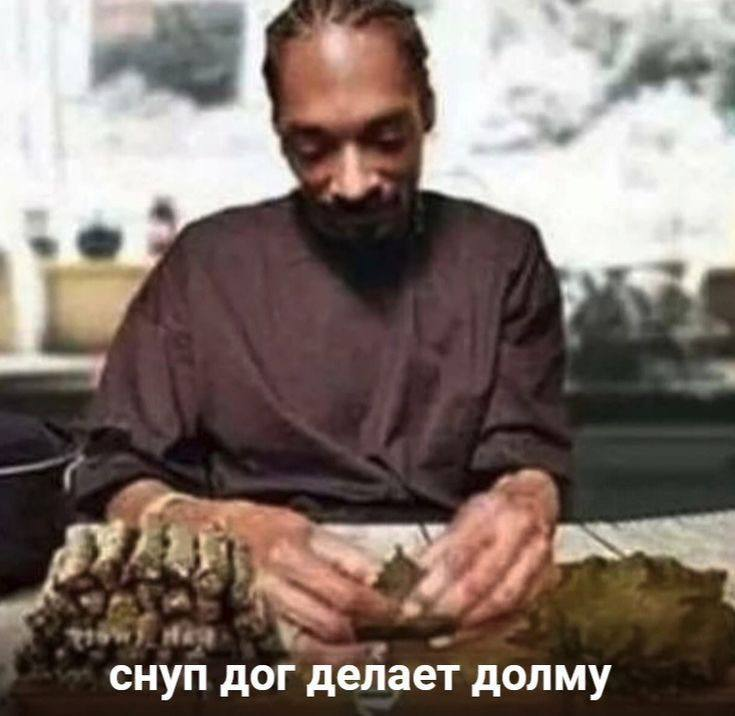

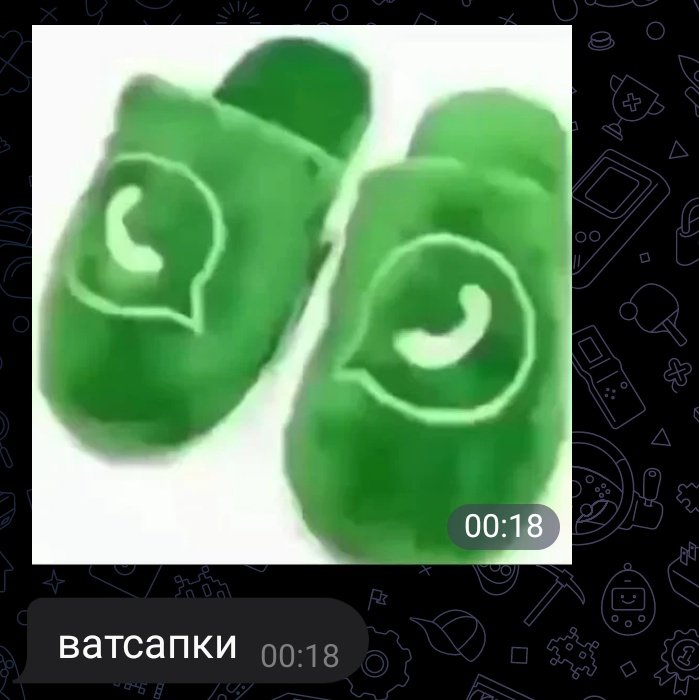

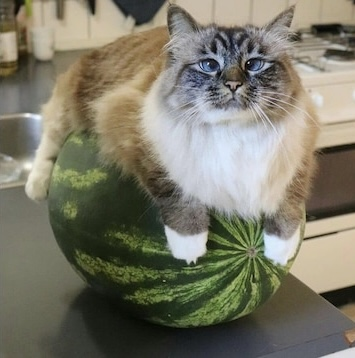

In [296]:
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

url = "https://i.ibb.co/ksHzw8MB/IMAGE-2025-02-17-23-59-35.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

display(img)



url = "https://i.ibb.co/Q3JxPHd7/IMG-2967.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

display(img)

url = "https://i.ibb.co/602NQ7TT/IMG-4541.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

display(img)

